In [5]:
import numpy as np
from glob import glob
import os
import des_utils
import des_io
import trigColors
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'
import matplotlib.transforms as transforms

In this document, I plot the 

0.1 0.001
3679
11 3679
0.1 0.001 0.00298994291927 0.00605326876513
0.1 0.01
7195
224 7195
0.1 0.01 0.0311327310632 0.0569203115638
0.1 0.1
3472
736 3472
0.1 0.1 0.21198156682 0.298472385429
0.2 0.001
3655
17 3655
0.2 0.001 0.0046511627907 0.00475624256837
0.2 0.01
7149
388 7149
0.2 0.01 0.0542733249406 0.0886287625418
0.2 0.1
3635
1032 3635
0.2 0.1 0.283906464924 0.386388583974
0.3 0.001
2892
35 2892
0.3 0.001 0.012102351314 0.00849858356941
0.3 0.01
5773
633 5773
0.3 0.01 0.109648363069 0.130532633158
0.3 0.1
2874
1541 2874
0.3 0.1 0.536186499652 0.414765100671
0.1 0.001
3679
2 3679
0.1 0.001 0.000543625985322 0.00242130750605
0.1 0.01
7195
57 7195
0.1 0.01 0.00792216817234 0.0173756740563
0.1 0.1
3472
226 3472
0.1 0.1 0.0650921658986 0.126909518214
0.2 0.001
3655
5 3655
0.2 0.001 0.00136798905609 0.00237812128419
0.2 0.01
7149
122 7149
0.2 0.01 0.0170653238215 0.0323299888517
0.2 0.1
3635
408 3635
0.2 0.1 0.112242090784 0.200878155873
0.3 0.001
2892
9 2892
0.3 0.001 0.00311203319502 

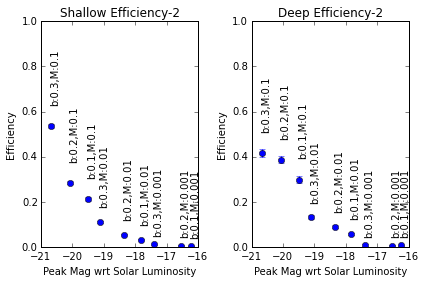

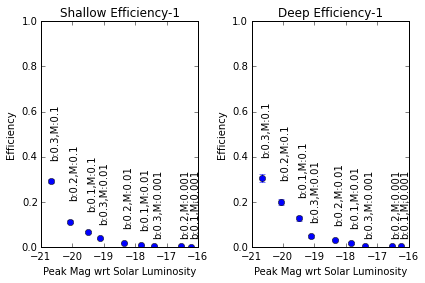

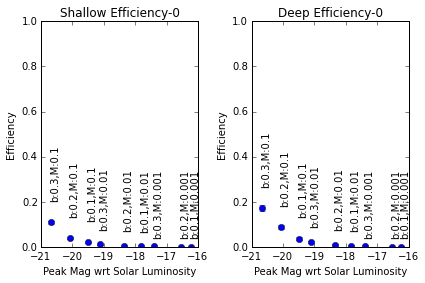

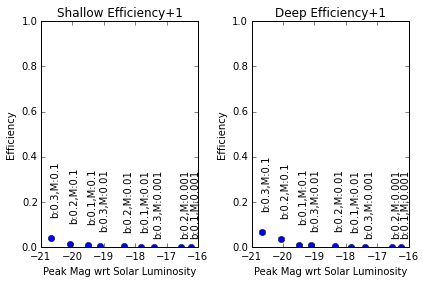

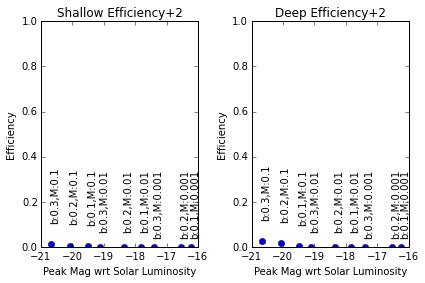

In [8]:
offsets = ['-2','-1','-0','+1','+2']
for offset in offsets:
    simpath = '../KNSimDataRateLims081715_z0.2/ZDNTEST_MAGOFF'+offset+'/*DAT'
    filetypes = ['sim']#['sim','data']
    paths = [simpath,"../DESY1_numepoch1_iz_real_text/*.dat"]
    fieldtypes = ['shallow','deep']
    dict1 = dict()  
    for n,fieldtype in enumerate(fieldtypes):
        dict1['sim_'+fieldtype] = trigColors.trigColors(simpath,'sim',fieldtype)
        dict1['sim_'+fieldtype]['detections'] = des_utils.get_detection_flags_list(dict1['sim_'+fieldtype]['cnites'],
                                                                                         dict1['sim_'+fieldtype]['zbandinfo'],
                                                                                         dict1['sim_'+fieldtype]['ibandinfo'],
                                                                                         3,10,1)
    L_bol = np.matrix([[1.2e40,1.6e40,3.5e40],[5.2e40,8.5e40,1.7e41],[2.4e41,4.1e41,7.2e41]]) # Each sub array is constant M going up in M from left to right.
    bolMag = -2.5*np.log10(L_bol/float(3.846e33))
    # within each sub array, go up in beta from left to right.
    beta = [0.1,0.2,0.3]
    M_sol = [0.001,0.01,0.1]
    dumpfile = "../KNSimDataRateLims081715_z0.2/ZDNTEST_MAGOFF" + offset +"/ZDNTEST_MAGOFF" + offset + ".DUMP"
    dumpdata = np.genfromtxt(dumpfile,skip_header=2)
    dumpbeta = np.around(np.array(dumpdata[:,30]),5)
    dumpM = np.around(np.array(dumpdata[:,32]),5)
    dumpSN = dumpdata[:,1]
    dumpSN = np.array([int(dumpSN[i]) for i,eye in enumerate(dumpSN)])
    dumpMu = dumpdata[:,12]
    dumpPeakMag = dumpdata[:,17]
    dumpFields = np.genfromtxt(dumpfile,skip_header=2,usecols=(8),dtype=None)
    modelDict = dict()
    simSNIDlist = [int(eye['SNID']) for i,eye in enumerate(dict1['sim_shallow']['headers'])]
    fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
    for bnum,b in enumerate(beta):
        for Mnum,M in enumerate(M_sol):
            print b, M
            key = 'b'+str(b)+'_'+'m'+str(M)
            Msel = dumpM == M
            bsel = dumpbeta == b 
            deep = (dumpFields == 'C3') | (dumpFields == 'X3')
            shal = ~deep
            shalsel = Msel & bsel & shal
            deepsel = Msel & bsel & deep
            print np.sum(shalsel)
            #modelDict[key] = dict()
            #modelDict[key]['SN'] = dumpSN[sel]
            shalSN = dumpSN[shalsel]
            deepSN = dumpSN[deepsel]
            totalshal = len(shalSN)
            totaldeep = len(deepSN)
            #modelDict[key]['Mu'] = dumpMu[sel]
            #modelDict[key]['PeakMag'] = dumpPeakMag[sel]
            #print b,M,np.mean(modelDict[key]['PeakMag']-modelDict[key]['Mu'])
            shalSNIDsel = np.in1d(simSNIDlist,shalSN)
            deepSNIDsel = np.in1d(simSNIDlist,deepSN)
            totalshalcut = np.sum(shalSNIDsel &dict1['sim_shallow']['trigs'] & dict1['sim_shallow']['detections'] & dict1['sim_shallow']['multitrig'])
            totaldeepcut = np.sum(deepSNIDsel &dict1['sim_deep']['trigs'] & dict1['sim_deep']['detections'] & dict1['sim_deep']['multitrig'])
            print totalshalcut, totalshal
            shalEff = float(totalshalcut)/float(totalshal)
            deepEff = float(totaldeepcut)/float(totaldeep)
            shalErr = np.sqrt(float(totalshalcut)*(1-shalEff))/float(totalshal)
            deepErr = np.sqrt(float(totaldeepcut)*(1-deepEff))/float(totaldeep)
            print b,M,shalEff,deepEff
            ax = axs[0]
            ax.errorbar(bolMag[Mnum,bnum], shalEff, yerr=shalErr,color='b',fmt='--o')
            ax.set_title('Shallow Efficiency'+offset)
            ax.set_xlabel('Peak Mag wrt Solar Luminosity')
            ax.set_ylabel('Efficiency')
            ax.text(bolMag[Mnum,bnum], (shalEff+.3),'b:'+str(b)+',M:'+str(M),rotation='vertical')
            ax.set_ylim([0,1])
            ax = axs[1]
            ax.errorbar(bolMag[Mnum,bnum], deepEff, yerr=deepErr,color='b',fmt='--o')
            ax.set_title('Deep Efficiency'+offset)
            ax.set_xlabel('Peak Mag wrt Solar Luminosity')
            ax.set_ylabel('Efficiency')
            ax.text(bolMag[Mnum,bnum], (deepEff+.3),'b:'+str(b)+',M:'+str(M),rotation='vertical')
            ax.set_ylim([0,1])
    plt.tight_layout()
 

[[-16.23542992 -16.54777676 -17.39764691]
 [-17.82748516 -18.36102411 -19.1135991 ]
 [-19.4880049  -20.06943644 -20.68080804]]
0 121
0.1 0.001 0.0 0.0
70 1315
0.1 0.01 0.0532319391635 0.06875
393 1382
0.1 0.1 0.284370477569 0.376770538244
2 139
0.2 0.001 0.0143884892086 0.0
138 1330
0.2 0.01 0.103759398496 0.151898734177
564 1504
0.2 0.1 0.375 0.243169398907
0 83
0.3 0.001 0.0 0.0
134 1023
0.3 0.01 0.130987292278 0.18410041841
702 1167
0.3 0.1 0.601542416452 0.456273764259


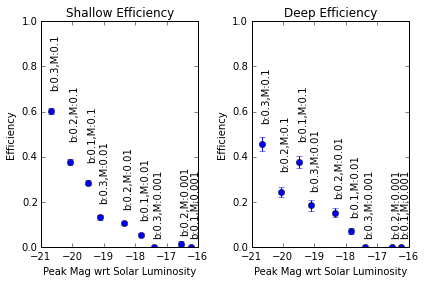

In [113]:
L_bol = np.matrix([[1.2e40,1.6e40,3.5e40],[5.2e40,8.5e40,1.7e41],[2.4e41,4.1e41,7.2e41]]) # Each sub array is constant M going up in M from left to right.
bolMag = -2.5*np.log10(L_bol/float(3.846e33))
print bolMag
# within each sub array, go up in beta from left to right.
beta = [0.1,0.2,0.3]
M_sol = [0.001,0.01,0.1]
dumpfile = "../KNSimDataRateLims081315/ZDNTEST_MAGOFF" + offset +"/ZDNTEST_MAGOFF" + offset + ".DUMP"
dumpdata = np.genfromtxt(dumpfile,skip_header=2)
dumpbeta = np.around(np.array(dumpdata[:,30]),5)
dumpM = np.around(np.array(dumpdata[:,31]),5)
dumpSN = dumpdata[:,1]
dumpSN = np.array([int(dumpSN[i]) for i,eye in enumerate(dumpSN)])
dumpMu = dumpdata[:,12]
dumpPeakMag = dumpdata[:,17]
dumpFields = np.genfromtxt(dumpfile,skip_header=2,usecols=(8),dtype=None)
modelDict = dict()
simSNIDlist = [int(eye['SNID']) for i,eye in enumerate(dict1['sim_shallow']['headers'])]
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
for bnum,b in enumerate(beta):
    for Mnum,M in enumerate(M_sol):
        key = 'b'+str(b)+'_'+'m'+str(M)
        Msel = dumpM == M
        bsel = dumpbeta == b 
        deep = (dumpFields == 'C3') | (dumpFields == 'X3')
        shal = ~deep
        shalsel = Msel & bsel & shal
        deepsel = Msel & bsel & deep
        #modelDict[key] = dict()
        #modelDict[key]['SN'] = dumpSN[sel]
        shalSN = dumpSN[shalsel]
        deepSN = dumpSN[deepsel]
        totalshal = len(shalSN)
        totaldeep = len(deepSN)
        #modelDict[key]['Mu'] = dumpMu[sel]
        #modelDict[key]['PeakMag'] = dumpPeakMag[sel]
        #print b,M,np.mean(modelDict[key]['PeakMag']-modelDict[key]['Mu'])
        shalSNIDsel = np.in1d(simSNIDlist,shalSN)
        deepSNIDsel = np.in1d(simSNIDlist,deepSN)
        totalshalcut = np.sum(shalSNIDsel &dict1['sim_shallow']['trigs'] & dict1['sim_shallow']['detections'] & dict1['sim_shallow']['multitrig'])
        totaldeepcut = np.sum(deepSNIDsel &dict1['sim_deep']['trigs'] & dict1['sim_deep']['detections'] & dict1['sim_deep']['multitrig'])
        print totalshalcut, totalshal
        shalEff = float(totalshalcut)/float(totalshal)
        deepEff = float(totaldeepcut)/float(totaldeep)
        shalErr = np.sqrt(float(totalshalcut)*(1-shalEff))/float(totalshal)
        deepErr = np.sqrt(float(totaldeepcut)*(1-deepEff))/float(totaldeep)
        print b,M,shalEff,deepEff
        ax = axs[0]
        ax.errorbar(bolMag[Mnum,bnum], shalEff, yerr=shalErr,color='b',fmt='--o')
        ax.set_title('Shallow Efficiency')
        ax.set_xlabel('Peak Mag wrt Solar Luminosity')
        ax.set_ylabel('Efficiency')
        ax.text(bolMag[Mnum,bnum], (shalEff+.3),'b:'+str(b)+',M:'+str(M),rotation='vertical')
        ax.set_ylim([0,1])
        ax = axs[1]
        ax.errorbar(bolMag[Mnum,bnum], deepEff, yerr=deepErr,color='b',fmt='--o')
        ax.set_title('Deep Efficiency')
        ax.set_xlabel('Peak Mag wrt Solar Luminosity')
        ax.set_ylabel('Efficiency')
        ax.text(bolMag[Mnum,bnum], (deepEff+.3),'b:'+str(b)+',M:'+str(M),rotation='vertical')
        ax.set_ylim([0,1])
plt.tight_layout()
        


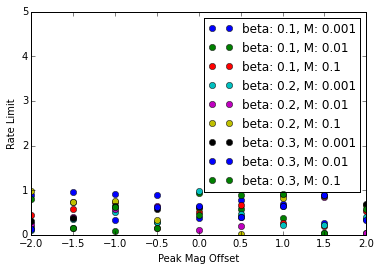

In [7]:
plt.figure()
beta = ['0.1','0.2','0.3']
Msol = ['0.001','0.01','0.1']
legendlist = []
for b in beta:
    for M in Msol:
        rateLims = np.random.rand(9)
        offsets = np.linspace(-2,2,9)
        plt.plot(offsets,rateLims,'o')
        legendlist.append('beta: ' + b + ', M: ' + M)
plt.legend(legendlist)
plt.axis([-2,2,0,5])
plt.xlabel('Peak Mag Offset')
plt.ylabel('Rate Limit')
